Universidad Tecnologica Nacional Buenos Aires
Ingenieria Industrial
Ciencia de Datos - [Curso] I5521 - Turno Sabado Mañana
Autores: Benedetto, Matias - Fatur, Tomas - Hara, Tobias


## Clasificación de personas de riesgo y predicción de su presión sistólica

In [ ]:
#Importamos los paquetes de herramientas necesarios:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#https://www.indec.gob.ar/ftp/cuadros/menusuperior/enfr/manual_base_usuario_enfr2018.pdf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


In [ ]:
%cd /content/drive/My Drive/Ciencia de datos TP

/content/drive/My Drive/Ciencia de datos TP


In [ ]:
riesgo = pd.read_csv('/content/drive/.shortcut-targets-by-id/1Zts-l0lnVaaTin8zIMuKBguRsve-NFs3/Ciencia de datos TP/factorderiesgo.csv', delimiter=';')


In [ ]:
riesgo.head()


,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,bhcv01,bhcv02,bhcv03,bhcv04,bhcv05,bhcv06,bhcv07,bhcv08,bhcv09,bhcv10,bhcv11,bhho01,bhho02,bhho03,cant_componentes,miembros_18,tipo_hogar,bhih01,bhih01_02,rango_ingreso,quintil_uc,imputado,bhih03,bhch03_j,bhch04_j,rango_edad_j,bhch05_j,nivel_instruccion_j,nivel_instruccion_agrupado_j,bhch10_01_j,bhch10_02_j,bhch10_03_j,bhch10_04_j,...,bicc01_02,bicc01_03,bicc02,bicc03,control_colon,bima01,bima02,bima03,bima04_01_a,bima04_01_b,bima04_02_a,bima04_02_b,bima04_03_a,bima04_03_b,promedio_sistolica,promedio_diastolica,ta_elevada,prevalencia_hipertension_combinada,bima06,bima07,bima09,bima10,imc_bima,imc_categorias_bima,bima12,bima13,bima14,bimq01,bimq05,bimq05_01,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisc,bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada,wf1p,wf2p,wf3p
0,1128639,2,1,1,1,1,1,3,2,1,2,1,1,1,1,1,1.0,1.0,1.0,2,1,2,2,2,50000,NaN,NaN,5,NaN,2,2,28,2,6,7,3,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,151.0,99.0,147.0,100.0,148.0,97.0,147.5,98.5,1.0,1.0,1.0,181.0,1.0,106.0,32.36,3.0,1.0,103.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2378,4464,0
1,1709939,2,1,1,1,1,0,1,4,1,2,1,1,1,1,1,1.0,1.0,1.0,4,3,3,3,4,40000,99.0,99.0,5,1.0,2,1,54,4,2,7,3,NaN,1.0,NaN,NaN,...,1.0,2.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3588,0,0
2,6874130,2,1,1,1,1,0,3,2,1,2,1,1,1,1,1,1.0,1.0,1.0,2,1,2,2,2,40000,99.0,12.0,5,1.0,2,1,41,3,6,7,3,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740,0,0
3,10319375,2,1,1,1,1,1,3,1,1,2,1,4,1,1,1,1.0,1.0,1.0,1,1,1,1,1,80000,NaN,NaN,5,NaN,2,2,64,4,3,7,3,1.0,NaN,NaN,NaN,...,1.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493,0,0
4,11140857,2,1,1,1,1,0,3,3,1,2,1,1,1,1,1,1.0,1.0,1.0,3,2,2,2,8,30000,99.0,9.0,5,1.0,2,1,25,2,6,6,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,0,0


In [ ]:
np.shape(riesgo)

(29224, 287)

In [ ]:
riesgo_tp=riesgo[['cod_provincia', 'bhcv01', 'tipo_hogar', 'bhih01', 'bhih03', 'bhch03', 'bhch04', 'bhch05', 'nivel_instruccion', 'condicion_actividad', 'bisg01', 'cobertura_salud','biaf01', 'barreras_actividad_fisica','bita01','biha03', 'bima10', 'bima07', 'bial05','bial08','bico03','bica01','bidi01','imc_bima','promedio_sistolica','promedio_diastolica','ta_elevada']]


In [ ]:
riesgo_tp.head()

,cod_provincia,bhcv01,tipo_hogar,bhih01,bhih03,bhch03,bhch04,bhch05,nivel_instruccion,condicion_actividad,bisg01,cobertura_salud,biaf01,barreras_actividad_fisica,bita01,biha03,bima10,bima07,bial05,bial08,bico03,bica01,bidi01,imc_bima,promedio_sistolica,promedio_diastolica,ta_elevada
0,2,3,2,50000,2,1,32,6,7,1,3,2,4,1,2,3,106.0,181.0,7.0,2,2,1,2,32.36,147.5,98.5,1.0
1,2,1,4,40000,2,2,65,2,7,1,1,1,3,1,1,3,NaN,NaN,5.0,2,1,1,2,NaN,NaN,NaN,NaN
2,2,3,2,40000,2,2,33,6,7,1,2,1,0,9,1,3,NaN,NaN,5.0,2,2,1,2,NaN,NaN,NaN,NaN
3,2,3,1,80000,2,2,64,3,7,1,3,1,0,1,1,3,NaN,NaN,7.0,2,1,1,2,NaN,NaN,NaN,NaN
4,2,3,8,30000,2,1,24,6,5,1,3,1,0,1,1,3,NaN,NaN,3.0,2,2,1,2,NaN,NaN,NaN,NaN


In [ ]:
np.shape(riesgo_tp)

(29224, 27)

In [ ]:
#Renombramos columnas
riesgo_tp.rename(columns={"bhcv01":"Tipo_Vivienda","bhih01":"Ingresos_Hogar","bhih03":"AUH","bhch03":"Sexo","bhch04":"Edad", "bhch05":"Situacion_Conyugal","bisg01":"Salud_General","biaf01":"Actividad_Fisica_PorSemana","bita01":"Fumo_Cigarrillo","biha03":"Cantidad_Diagnosticos_PresionAlta", "bima10":"Peso", "bima07":"Altura", "bial05":"Cantidad_Dias_Verdura", "bial08":"Alimentacion", "bico03":"Colesterol", "bica01":"Bebio_Alcohol", "bidi01":"Diabetes","imc_bima":"Masa_Corporal","ta_elevada":"Presion_Arterial"}, inplace=True)


In [ ]:
riesgo_tp.head()

,cod_provincia,Tipo_Vivienda,tipo_hogar,Ingresos_Hogar,AUH,Sexo,Edad,Situacion_Conyugal,nivel_instruccion,condicion_actividad,Salud_General,cobertura_salud,Actividad_Fisica_PorSemana,barreras_actividad_fisica,Fumo_Cigarrillo,Cantidad_Diagnosticos_PresionAlta,Peso,Altura,Cantidad_Dias_Verdura,Alimentacion,Colesterol,Bebio_Alcohol,Diabetes,Masa_Corporal,promedio_sistolica,promedio_diastolica,Presion_Arterial
0,2,3,2,50000,2,1,32,6,7,1,3,2,4,1,2,3,106.0,181.0,7.0,2,2,1,2,32.36,147.5,98.5,1.0
1,2,1,4,40000,2,2,65,2,7,1,1,1,3,1,1,3,NaN,NaN,5.0,2,1,1,2,NaN,NaN,NaN,NaN
2,2,3,2,40000,2,2,33,6,7,1,2,1,0,9,1,3,NaN,NaN,5.0,2,2,1,2,NaN,NaN,NaN,NaN
3,2,3,1,80000,2,2,64,3,7,1,3,1,0,1,1,3,NaN,NaN,7.0,2,1,1,2,NaN,NaN,NaN,NaN
4,2,3,8,30000,2,1,24,6,5,1,3,1,0,1,1,3,NaN,NaN,3.0,2,2,1,2,NaN,NaN,NaN,NaN


In [ ]:
riesgo_tp.isnull().any()



cod_provincia                        False
Tipo_Vivienda                        False
tipo_hogar                           False
Ingresos_Hogar                       False
AUH                                  False
Sexo                                 False
Edad                                 False
Situacion_Conyugal                   False
nivel_instruccion                    False
condicion_actividad                  False
Salud_General                        False
cobertura_salud                      False
Actividad_Fisica_PorSemana           False
barreras_actividad_fisica            False
Fumo_Cigarrillo                      False
Cantidad_Diagnosticos_PresionAlta    False
Peso                                  True
Altura                                True
Cantidad_Dias_Verdura                 True
Alimentacion                         False
Colesterol                           False
Bebio_Alcohol                        False
Diabetes                             False
Masa_Corpor

In [ ]:
riesgo_tp.isnull().sum()

cod_provincia                            0
Tipo_Vivienda                            0
tipo_hogar                               0
Ingresos_Hogar                           0
AUH                                      0
Sexo                                     0
Edad                                     0
Situacion_Conyugal                       0
nivel_instruccion                        0
condicion_actividad                      0
Salud_General                            0
cobertura_salud                          0
Actividad_Fisica_PorSemana               0
barreras_actividad_fisica                0
Fumo_Cigarrillo                          0
Cantidad_Diagnosticos_PresionAlta        0
Peso                                 12799
Altura                               12733
Cantidad_Dias_Verdura                  287
Alimentacion                             0
Colesterol                               0
Bebio_Alcohol                            0
Diabetes                                 0
Masa_Corpor

In [ ]:
riesgo_tp['cod_provincia'] = riesgo_tp['cod_provincia'].map({2 : 'Ciudad de Buenos Aires' ,6 : 'Buenos Aires',10 : 'Catamarca',14 : 'Cordoba',18 : 'Corrientes',22 : 'Chaco',26 : 'Chubut',30 : 'Entre Rios',34 : 'Formosa',38 : 'Jujuy',42 : 'La Pampa',46 : 'La Rioja',50 : 'Mendoza',54 : 'Misiones',58 : 'Neuquen',62 : 'Rio Negro',66 : 'Salta',70 : 'San Juan',74 : 'San Luis',78 : 'Santa Cruz',82 : 'Santa Fe',86 : 'Santiago del Estero',90 : 'Tucuman',94 : 'Tierra del Fuego'})
riesgo_tp['Tipo_Vivienda'] = riesgo_tp['Tipo_Vivienda'].map({1 : 'Casa' ,2 : 'Casilla',3 : 'Departamento',4 : 'Pieza de inquilinato',5 : 'Pieza en hotel o pensión',6 : 'Local no construido para habitación',7 : 'Otros'})
riesgo_tp['tipo_hogar'] = riesgo_tp['tipo_hogar'].map({1 : 'Hogar unipersonal' ,2 : 'Cony completo s/hijos ni otros',3 : 'Cony completo s/hijos y c/otros',4 : 'Cony completo c/hijos s/otros',5 : 'Cony completo c/hijos y otros',6 : 'Cony incompleto sin otros',7 : 'Cony incompleto c/otros',8 : 'No conyugal'})
riesgo_tp['AUH'] = riesgo_tp['AUH'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['Sexo'] = riesgo_tp['Sexo'].map({1 : 'Hombre' ,2 : 'Mujer'})
riesgo_tp['cobertura_salud'] = riesgo_tp['cobertura_salud'].map({1:'Si',2:'No'})
riesgo_tp['Situacion_Conyugal'] = riesgo_tp['Situacion_Conyugal'].map({1 : 'Unido/a' ,2 : 'Casado/a',3 : 'Separado/a',4 : 'Divorciado/a',5 : 'Viudo/a',6 : 'Soltero/a'})
riesgo_tp['nivel_instruccion'] = riesgo_tp['nivel_instruccion'].map({1 : 'Sin instrucción' ,2 : 'Primario incompleto',3 : 'Primario completo',4 : 'Secundario incompleto',5 : 'Secundario completo',6 : 'Terciario/universitario incompleto',7 : 'Terciario/universitario completo',8 : 'Educación especial'})
riesgo_tp['Cantidad_Diagnosticos_PresionAlta'] = riesgo_tp['Cantidad_Diagnosticos_PresionAlta'].map({1 : 'Sólo 1 vez' ,2 : 'Más de 1 vez',3 : 'Ninguna',99 : 'NS/NC'})
riesgo_tp['barreras_actividad_fisica'] = riesgo_tp['barreras_actividad_fisica'].map({1 : 'Falta de tiempo' ,2 : 'Falta de dinero',3 : 'Falta de instalaciones',4 : 'Por la distancia',5 : 'Razones de salud',6 : 'Falta de información',7 : 'Falta de seguridad',8 : 'No le interesa',9 : 'Falta de voluntad',10 : 'Otro',11:'Hace la cantidad indicada', 12:'Razones climáticas',13:'Por cuidado de personas'})
riesgo_tp['Alimentacion'] = riesgo_tp['Alimentacion'].map({1 : 'Muy saludable' ,2 : 'Bastante saludable',3 : 'Poco saludable',4 : 'Nada saludable',99 : 'NS/NC'})
riesgo_tp['Colesterol'] = riesgo_tp['Colesterol'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['condicion_actividad'] = riesgo_tp['condicion_actividad'].map({1 : 'Ocupado' ,2 : 'Desocupado',3 : 'Inactivo'})
riesgo_tp['Salud_General'] = riesgo_tp['Salud_General'].map({1 : 'Excelente' ,2 : 'Muy buena',3 : 'Buena',4 : 'Regular',5 : 'Mala'})
riesgo_tp['Fumo_Cigarrillo'] = riesgo_tp['Fumo_Cigarrillo'].map({1 : 'Si' ,2 : 'No'})
riesgo_tp['Bebio_Alcohol'] = riesgo_tp['Bebio_Alcohol'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['Diabetes'] = riesgo_tp['Diabetes'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['Presion_Arterial'] = riesgo_tp['Presion_Arterial'].map({1 : 'Elevada' ,2 : 'No elevada'})


In [ ]:
riesgo_tp.head()

,cod_provincia,Tipo_Vivienda,tipo_hogar,Ingresos_Hogar,AUH,Sexo,Edad,Situacion_Conyugal,nivel_instruccion,condicion_actividad,Salud_General,cobertura_salud,Actividad_Fisica_PorSemana,barreras_actividad_fisica,Fumo_Cigarrillo,Cantidad_Diagnosticos_PresionAlta,Peso,Altura,Cantidad_Dias_Verdura,Alimentacion,Colesterol,Bebio_Alcohol,Diabetes,Masa_Corporal,promedio_sistolica,promedio_diastolica,Presion_Arterial
0,Ciudad de Buenos Aires,Departamento,Cony completo s/hijos ni otros,50000,No,Hombre,32,Soltero/a,Terciario/universitario completo,Ocupado,Buena,No,4,Falta de tiempo,No,Ninguna,106.0,181.0,7.0,Bastante saludable,No,Si,No,32.36,147.5,98.5,Elevada
1,Ciudad de Buenos Aires,Casa,Cony completo c/hijos s/otros,40000,No,Mujer,65,Casado/a,Terciario/universitario completo,Ocupado,Excelente,Si,3,Falta de tiempo,Si,Ninguna,NaN,NaN,5.0,Bastante saludable,Si,Si,No,NaN,NaN,NaN,NaN
2,Ciudad de Buenos Aires,Departamento,Cony completo s/hijos ni otros,40000,No,Mujer,33,Soltero/a,Terciario/universitario completo,Ocupado,Muy buena,Si,0,Falta de voluntad,Si,Ninguna,NaN,NaN,5.0,Bastante saludable,No,Si,No,NaN,NaN,NaN,NaN
3,Ciudad de Buenos Aires,Departamento,Hogar unipersonal,80000,No,Mujer,64,Separado/a,Terciario/universitario completo,Ocupado,Buena,Si,0,Falta de tiempo,Si,Ninguna,NaN,NaN,7.0,Bastante saludable,Si,Si,No,NaN,NaN,NaN,NaN
4,Ciudad de Buenos Aires,Departamento,No conyugal,30000,No,Hombre,24,Soltero/a,Secundario completo,Ocupado,Buena,Si,0,Falta de tiempo,Si,Ninguna,NaN,NaN,3.0,Bastante saludable,No,Si,No,NaN,NaN,NaN,NaN


In [ ]:
np.shape(riesgo_tp)

(29224, 27)

In [ ]:
def flag_riesgo_tp(riesgo_tp):

    if (riesgo_tp['Diabetes'] == 'Si') or (riesgo_tp['Colesterol'] == 'Si')or(riesgo_tp['Masa_Corporal'] >= 30) :
        return 'Paciente de riesgo'
    else :
        return "No es Paciente de riesgo"
        
riesgo_tp['Riesgo'] = riesgo_tp.apply(flag_riesgo_tp, axis = 1)

In [ ]:
riesgo_tp.columns.tolist()

['cod_provincia',
 'Tipo_Vivienda',
 'tipo_hogar',
 'Ingresos_Hogar',
 'AUH',
 'Sexo',
 'Edad',
 'Situacion_Conyugal',
 'nivel_instruccion',
 'condicion_actividad',
 'Salud_General',
 'cobertura_salud',
 'Actividad_Fisica_PorSemana',
 'barreras_actividad_fisica',
 'Fumo_Cigarrillo',
 'Cantidad_Diagnosticos_PresionAlta',
 'Peso',
 'Altura',
 'Cantidad_Dias_Verdura',
 'Alimentacion',
 'Colesterol',
 'Bebio_Alcohol',
 'Diabetes',
 'Masa_Corporal',
 'promedio_sistolica',
 'promedio_diastolica',
 'Presion_Arterial',
 'Riesgo']

In [ ]:
total = riesgo_tp.isnull().sum().sort_values(ascending = False)
percent = (riesgo_tp.isnull().sum()/riesgo_tp.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
promedio_diastolica,12997,0.444737
promedio_sistolica,12997,0.444737
Presion_Arterial,12997,0.444737
Masa_Corporal,12814,0.438475
Peso,12799,0.437962
Altura,12733,0.435704


In [ ]:
np.shape(riesgo_tp)

(29224, 28)

In [ ]:
riesgo_tp.dropna(how ='any', inplace = True)

In [ ]:
np.shape(riesgo_tp)

(15912, 28)

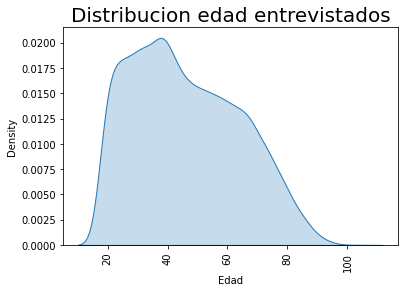

In [ ]:
sns.kdeplot(riesgo_tp.Edad, shade = True)
plt.xlabel("Edad")
plt.xticks(rotation=90)
plt.title('Distribucion edad entrevistados',size = 20)
plt.show()

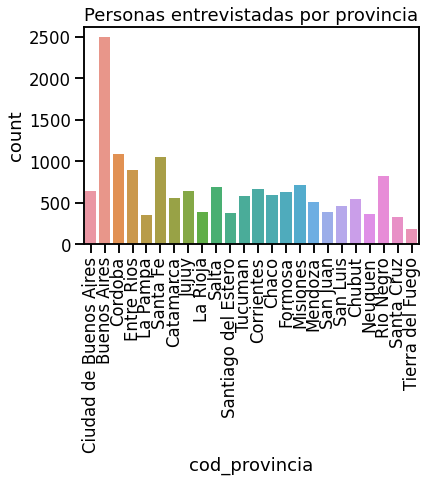

In [ ]:
sns.set_context("talk")
az = sns.countplot(x="cod_provincia", data=riesgo_tp)
plt.xticks(rotation=90)
plt.title("Personas entrevistadas por provincia")
plt.show()

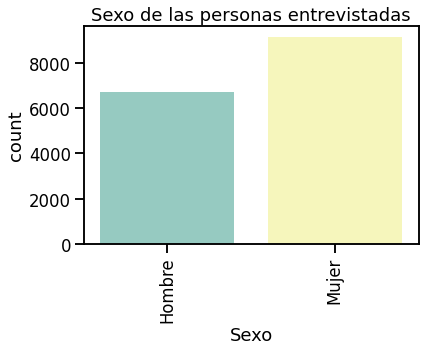

In [ ]:
sns.set_context("talk")
az = sns.countplot(x="Sexo", data=riesgo_tp, palette="Set3")
plt.xticks(rotation=90)
plt.title("Sexo de las personas entrevistadas")
plt.show()

In [ ]:
def flag_riesgo_tp(riesgo_tp):

    if (riesgo_tp['Diabetes'] == 'Si') or (riesgo_tp['Colesterol'] == 'Si')or(riesgo_tp['Masa_Corporal'] >= 30)or(riesgo_tp['promedio_sistolica'] >= 130) :
        return 'Paciente de riesgo'
    else :
        return "No es Paciente de riesgo"
        
riesgo_tp['Riesgo'] = riesgo_tp.apply(flag_riesgo_tp, axis = 1)

In [ ]:
riesgo_tp_diabetes = riesgo_tp.loc[riesgo_tp['Diabetes'] == 'Si']
riesgo_tp_diabetes.head()
np.shape(riesgo_tp_diabetes)

(2233, 28)

In [ ]:
Diabetes = (riesgo_tp['Riesgo'] == 'Paciente de riesgo').groupby(riesgo_tp['cod_provincia']).agg(lambda x: x.sum() / len(x)*100).reset_index(name='Porcentaje')
Diabetes.head(25)

,cod_provincia,Porcentaje
0,Buenos Aires,70.112179
1,Catamarca,62.181818
2,Chaco,64.983165
3,Chubut,70.437956
4,Ciudad de Buenos Aires,66.251944
5,Cordoba,66.851339
6,Corrientes,65.165165
7,Entre Rios,68.686869
8,Formosa,63.461538
9,Jujuy,63.108320


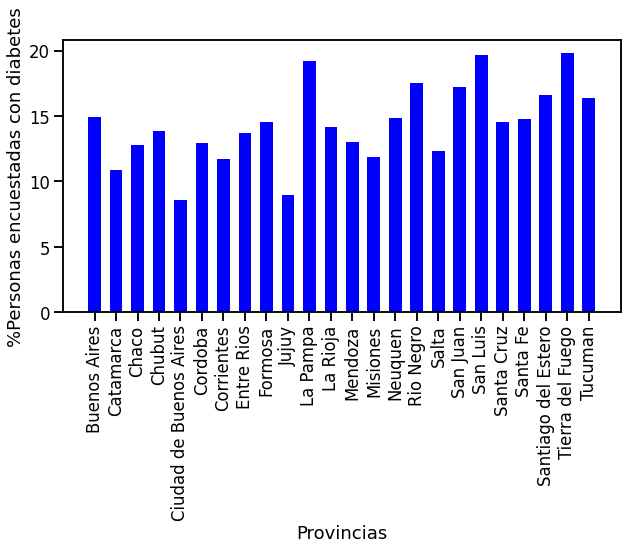

In [ ]:

fig = plt.figure(figsize = (10, 5)) 
  
x=Diabetes.cod_provincia
y=Diabetes.Porcentaje

plt.bar(x, y, color ='blue',  
        width = 0.6) 
  
plt.xlabel("Provincias") 
plt.ylabel("%Personas encuestadas con diabetes") 
plt.xticks(rotation=90)

plt.show() 

In [ ]:
#Aplicamos el % de personas con diabetes por provincia
Colesterol = (riesgo_tp['Colesterol'] == 'Si').groupby(riesgo_tp['cod_provincia']).agg(lambda x: x.sum() / len(x)*100).reset_index(name='Porcentaje')


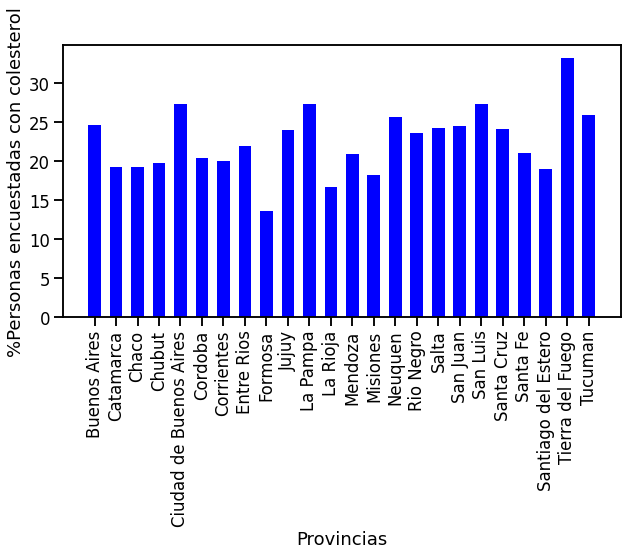

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
  
x_c=Colesterol.cod_provincia
y_c=Colesterol.Porcentaje

plt.bar(x_c, y_c, color ='blue',  
        width = 0.6) 
  
plt.xlabel("Provincias") 
plt.ylabel("%Personas encuestadas con colesterol") 
plt.xticks(rotation=90)

plt.show() 

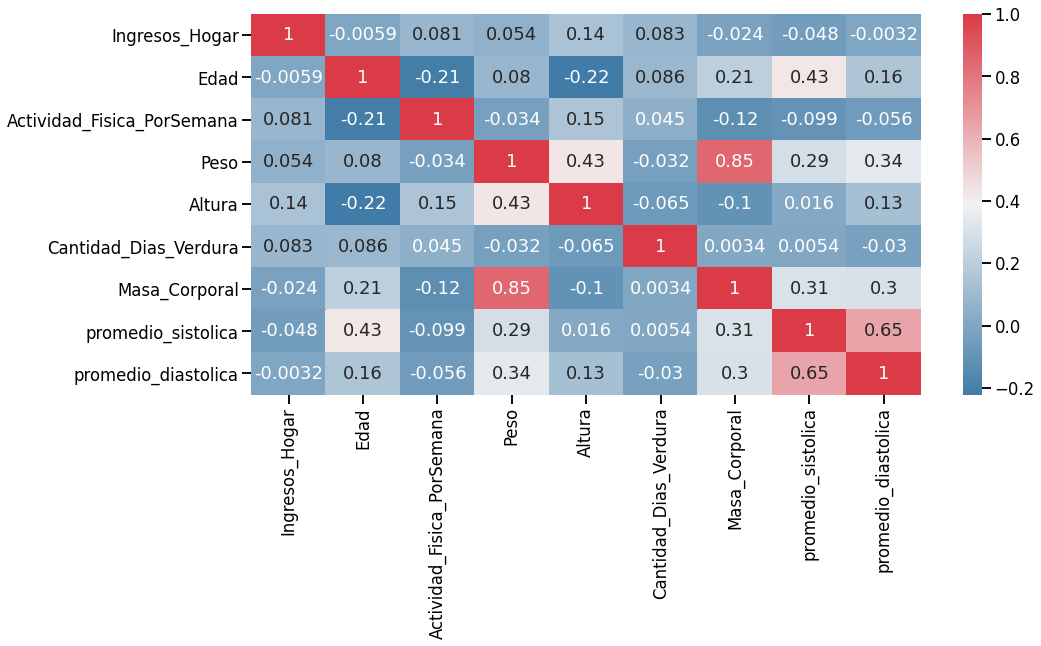

In [ ]:

corrmat = riesgo_tp.corr()

f, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [ ]:
cont_provincia= riesgo_tp.groupby('cod_provincia')['Diabetes'].agg(['count'])


In [ ]:
riesgo_tp.loc[(riesgo_tp['Edad']>18) & (riesgo_tp['Edad']<=30),'Rango_de_edad'] = 'Entre 18 y 30 años'
riesgo_tp.loc[(riesgo_tp['Edad']>30) & (riesgo_tp['Edad']<=40),'Rango_de_edad'] = 'Entre 30 y 40 años'
riesgo_tp.loc[(riesgo_tp['Edad']>40) & (riesgo_tp['Edad']<=50),'Rango_de_edad'] = 'Entre 40 y 50 años'
riesgo_tp.loc[(riesgo_tp['Edad']>50) & (riesgo_tp['Edad']<=60),'Rango_de_edad'] = 'Entre 50 y 60 años'
riesgo_tp.loc[(riesgo_tp['Edad']>60) & (riesgo_tp['Edad']<=70),'Rango_de_edad'] = 'Entre 60 y 70 años'
riesgo_tp.loc[(riesgo_tp['Edad']>70),'Rango_de_edad'] = 'Mayor a 70 años'

In [ ]:
riesgo_tp.head()

,cod_provincia,Tipo_Vivienda,tipo_hogar,Ingresos_Hogar,AUH,Sexo,Edad,Situacion_Conyugal,nivel_instruccion,condicion_actividad,Salud_General,cobertura_salud,Actividad_Fisica_PorSemana,barreras_actividad_fisica,Fumo_Cigarrillo,Cantidad_Diagnosticos_PresionAlta,Peso,Altura,Cantidad_Dias_Verdura,Alimentacion,Colesterol,Bebio_Alcohol,Diabetes,Masa_Corporal,promedio_sistolica,promedio_diastolica,Presion_Arterial,Riesgo,Rango_de_edad
0,Ciudad de Buenos Aires,Departamento,Cony completo s/hijos ni otros,50000,No,Hombre,32,Soltero/a,Terciario/universitario completo,Ocupado,Buena,No,4,Falta de tiempo,No,Ninguna,106.0,181.0,7.0,Bastante saludable,No,Si,No,32.36,147.5,98.5,Elevada,Paciente de riesgo,Entre 30 y 40 años
7,Ciudad de Buenos Aires,Otros,Cony completo c/hijos s/otros,40000,No,Mujer,42,Casado/a,Terciario/universitario completo,Ocupado,Muy buena,Si,0,Falta de tiempo,Si,Ninguna,58.0,159.0,7.0,Bastante saludable,Si,Si,No,22.94,103.0,84.0,No elevada,Paciente de riesgo,Entre 40 y 50 años
8,Ciudad de Buenos Aires,Casa,Cony completo s/hijos ni otros,40000,No,Hombre,32,Unido/a,Terciario/universitario completo,Ocupado,Excelente,No,0,Falta de voluntad,Si,Ninguna,71.0,184.0,3.0,Poco saludable,No,Si,No,20.97,139.0,105.0,Elevada,Paciente de riesgo,Entre 30 y 40 años
11,Ciudad de Buenos Aires,Casa,Cony completo s/hijos ni otros,16000,No,Hombre,76,Casado/a,Secundario incompleto,Inactivo,Buena,Si,0,Falta de voluntad,No,Ninguna,95.0,164.0,3.0,Bastante saludable,No,Si,No,35.32,168.0,93.5,Elevada,Paciente de riesgo,Mayor a 70 años
13,Ciudad de Buenos Aires,Departamento,Hogar unipersonal,37000,No,Mujer,63,Soltero/a,Terciario/universitario incompleto,Inactivo,Regular,Si,0,Razones de salud,Si,Más de 1 vez,86.0,168.0,0.0,Poco saludable,No,Si,Si,30.47,144.5,90.5,Elevada,Paciente de riesgo,Entre 60 y 70 años


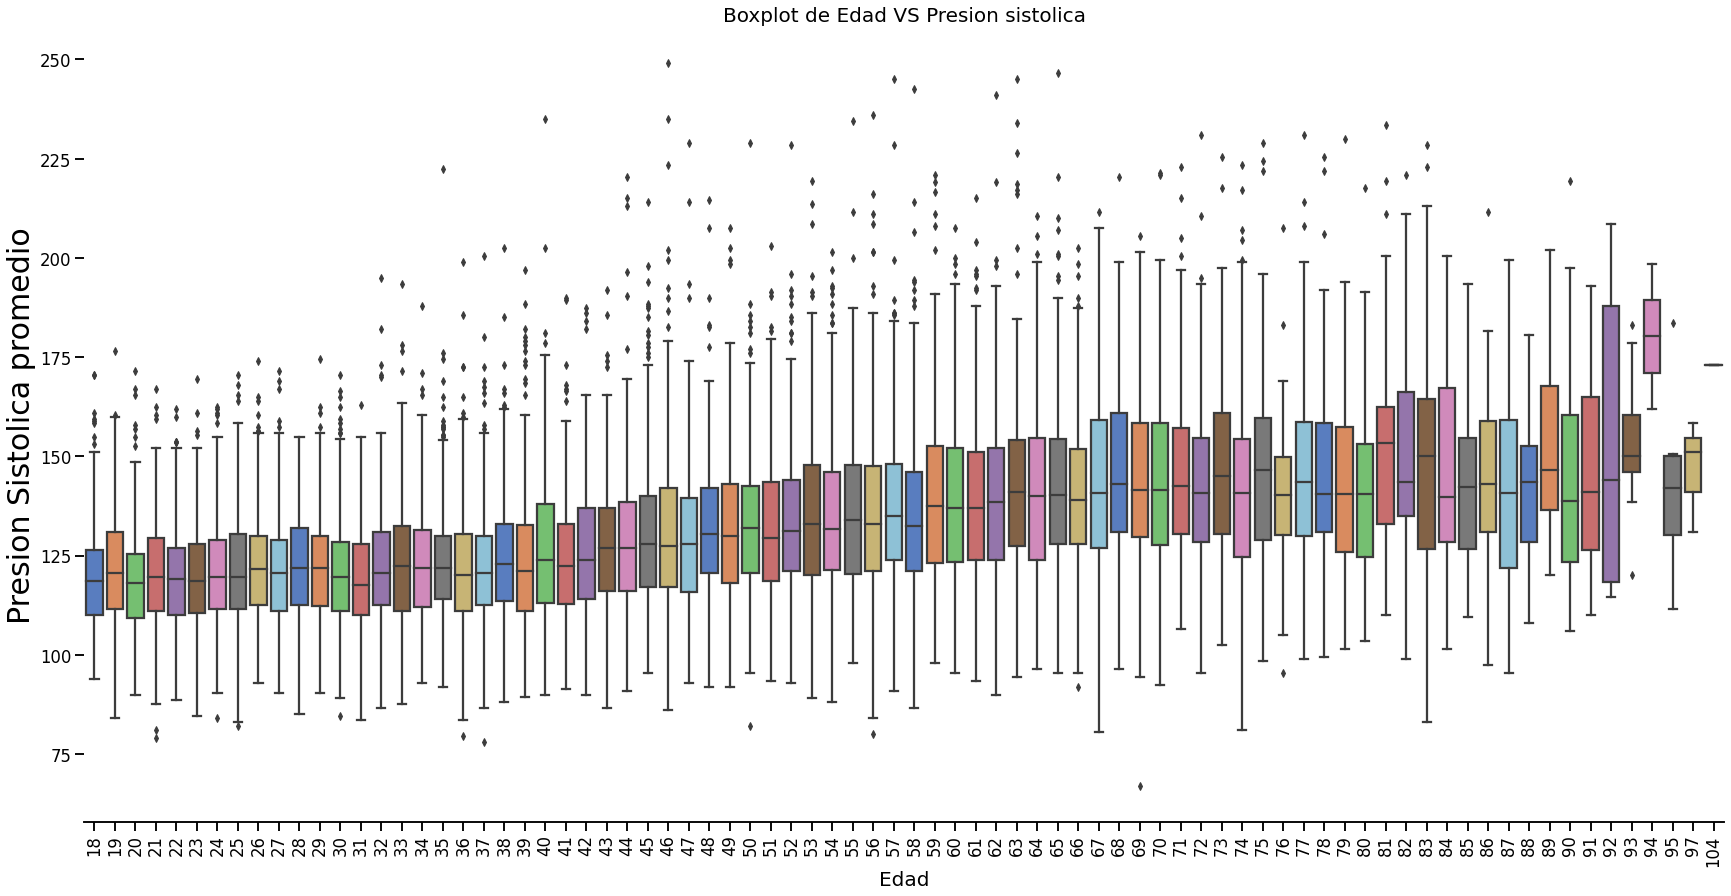

In [ ]:
#Observamos que a medida que crece la edad, tambien crece las presiones sistolicas de las personas. Ademas al crecer la edad tambien vemos una gran amplitud
# Todas las categorias
g = sns.catplot(x="Edad",y="promedio_sistolica",
                data=riesgo_tp, 
                kind="box",
                palette = "muted",
                height = 12 ,aspect=2)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Edad",size = 20)
plt.ylabel("Presion Sistolica promedio",size = 30)
plt.title('Boxplot de Edad VS Presion sistolica',size = 20)
plt.show()

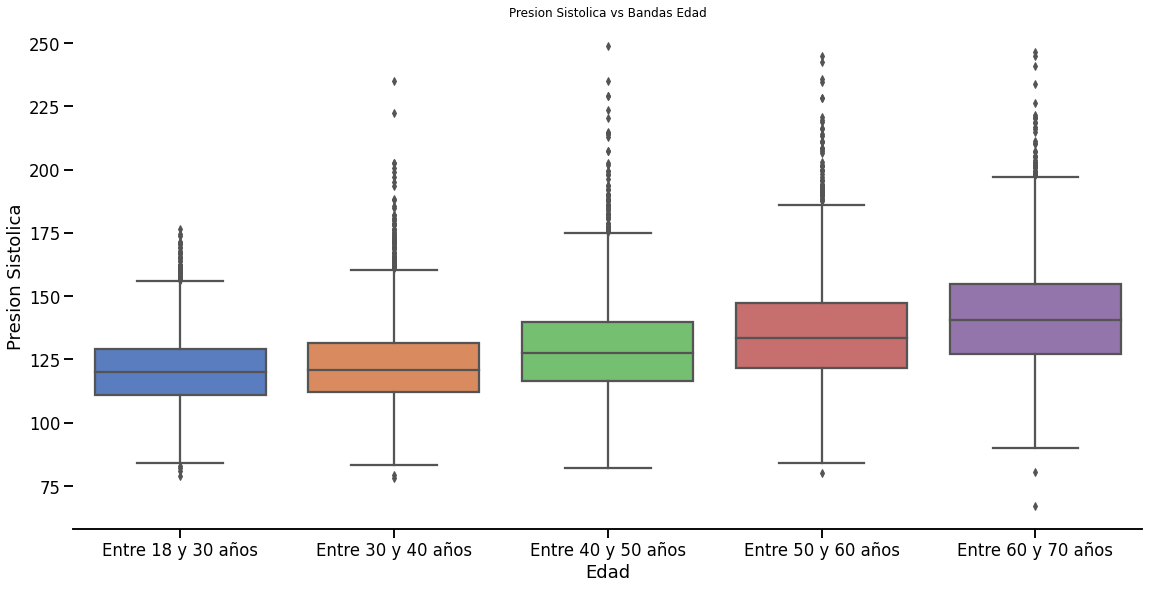

In [ ]:

g = sns.catplot(y = "promedio_sistolica", x ="Rango_de_edad" , data= riesgo_tp, kind="box", height = 8,aspect=2 ,palette = "muted", order = ["Entre 18 y 30 años", "Entre 30 y 40 años", "Entre 40 y 50 años", "Entre 50 y 60 años", "Entre 60 y 70 años"])
g.despine(left=True)
plt.xlabel("Edad")
plt.ylabel("Presion Sistolica")
plt.title('Presion Sistolica vs Bandas Edad',size = 12)
plt.show()

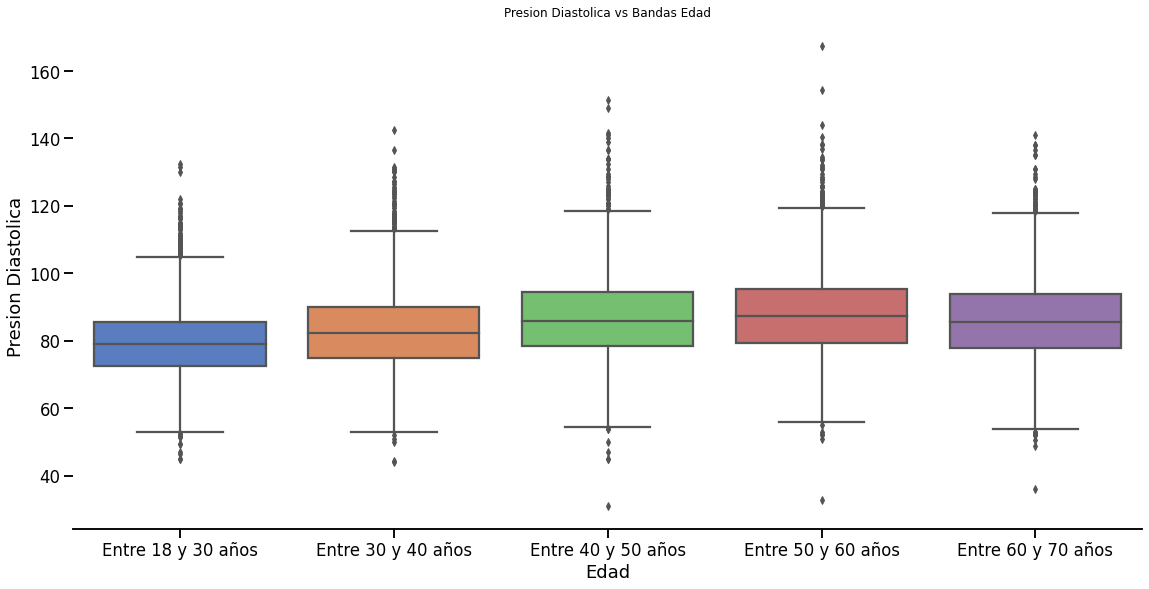

In [ ]:

g = sns.catplot(y = "promedio_diastolica", x ="Rango_de_edad" , data= riesgo_tp, kind="box", height = 8,aspect=2 ,palette = "muted", order = ["Entre 18 y 30 años", "Entre 30 y 40 años", "Entre 40 y 50 años", "Entre 50 y 60 años", "Entre 60 y 70 años"])
g.despine(left=True)
plt.xlabel("Edad")
plt.ylabel("Presion Diastolica")
plt.title('Presion Diastolica vs Bandas Edad',size = 12)
plt.show()



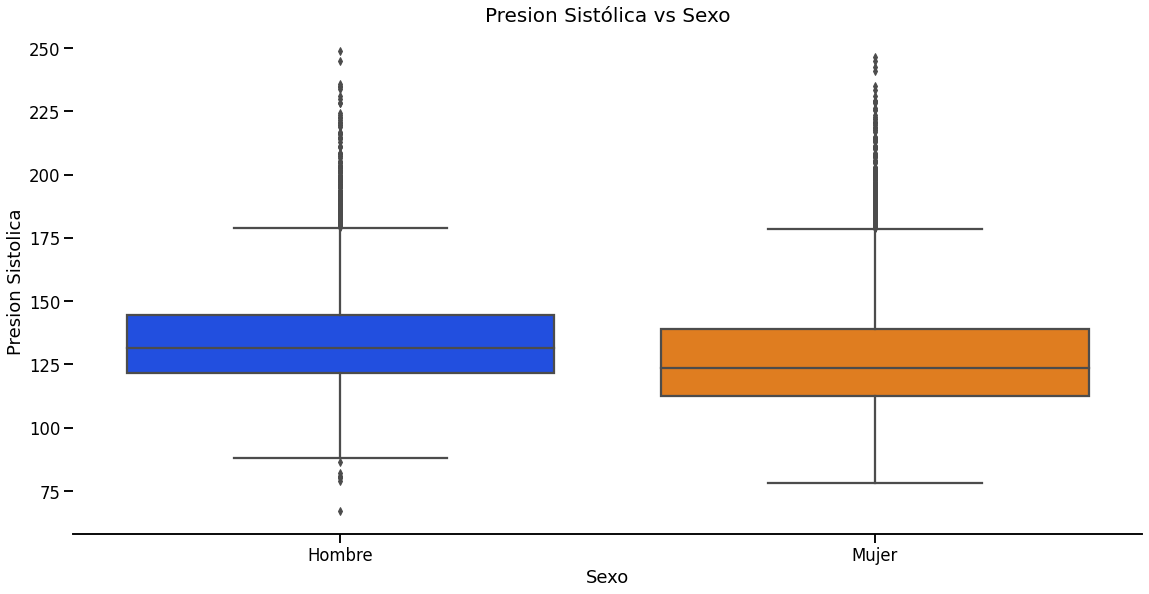

In [ ]:

g = sns.catplot(y = "promedio_sistolica", x ="Sexo" , data= riesgo_tp, kind="box", height = 8,aspect=2 ,palette = "bright", order = ["Hombre", "Mujer"])
g.despine(left=True)
plt.xlabel("Sexo")
plt.ylabel("Presion Sistolica")
plt.title('Presion Sistólica vs Sexo',size = 20)
plt.show()



Las mujeres tienen mas variabilidad



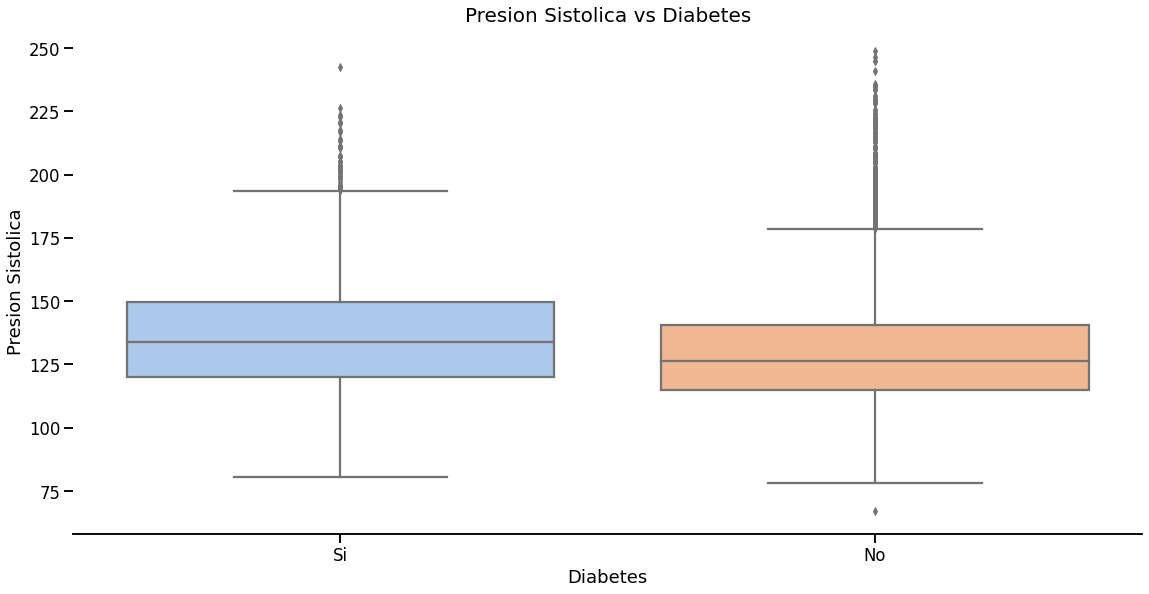

In [ ]:

g = sns.catplot(y = "promedio_sistolica", x ="Diabetes" , data= riesgo_tp, kind="box", height = 8,aspect=2 ,palette = "pastel", order = ["Si", "No"])
g.despine(left=True)
plt.xlabel("Diabetes")
plt.ylabel("Presion Sistolica")
plt.title('Presion Sistolica vs Diabetes',size = 20)
plt.show()


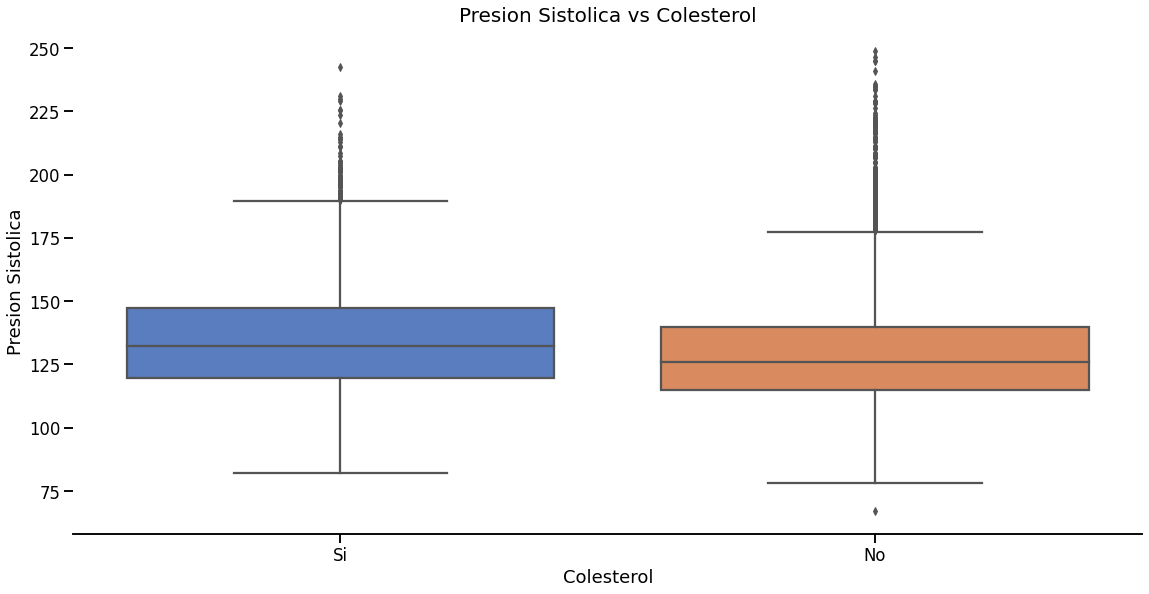

In [ ]:

g = sns.catplot(y = "promedio_sistolica", x ="Colesterol" , data= riesgo_tp, kind="box", height = 8,aspect=2 ,palette = "muted", order = ["Si", "No"])
g.despine(left=True)
plt.xlabel("Colesterol")
plt.ylabel("Presion Sistolica")
plt.title('Presion Sistolica vs Colesterol',size = 20)
plt.show()


In [ ]:
salud=riesgo_tp.groupby('Salud_General').size().sort_values(ascending=False)
salud

Salud_General
Buena        6797
Muy buena    3837
Regular      3341
Excelente    1502
Mala          435
dtype: int64

In [ ]:
cat_salud=pd.get_dummies(riesgo_tp.Salud_General)

In [ ]:
cat_salud_riesgo_tp = pd.concat([riesgo_tp, cat_salud], axis = 1)

In [ ]:
pivot_edad=pd.pivot_table(cat_salud_riesgo_tp,values=["Excelente","Muy buena","Buena","Regular","Mala"],index='Rango_de_edad',aggfunc='sum')
pivot_edad

,Buena,Excelente,Mala,Muy buena,Regular
Rango_de_edad,,,,,
Entre 18 y 30 años,1477.0,521.0,29,1063.0,408.0
Entre 30 y 40 años,1405.0,333.0,44,959.0,488.0
Entre 40 y 50 años,1181.0,214.0,61,644.0,588.0
Entre 50 y 60 años,1022.0,162.0,99,452.0,642.0
Entre 60 y 70 años,886.0,125.0,99,330.0,636.0
Mayor a 70 años,750.0,84.0,102,290.0,552.0


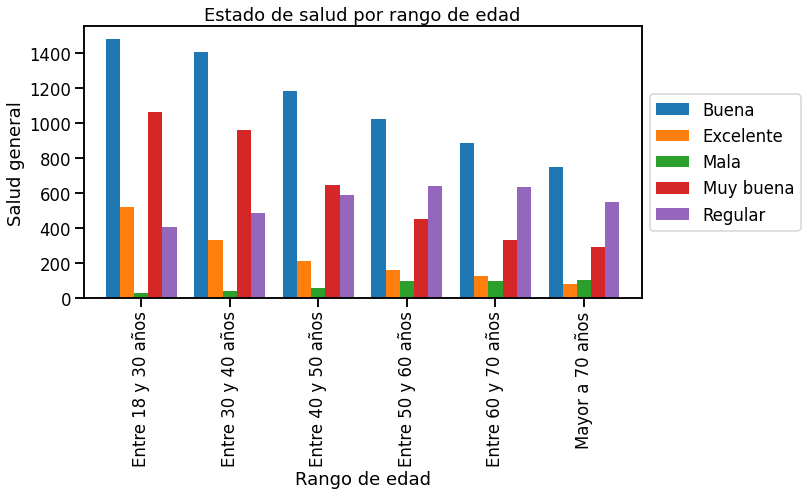

In [ ]:

pivot_edad.plot(kind='bar',figsize=(10,5),width=(0.8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Estado de salud por rango de edad")
plt.xlabel("Rango de edad")
plt.ylabel("Salud general")
plt.show()

In [ ]:
riesgo_tp2=

In [ ]:
Riesgo_actividadfisica = (riesgo_tp['Riesgo'] == 'Paciente de riesgo').groupby(riesgo_tp['Actividad_Fisica_PorSemana']).agg(lambda x: x.sum() / len(x)*100).reset_index(name='Porcentaje')
Riesgo_actividadfisica

,Actividad_Fisica_PorSemana,Porcentaje
0,0,70.045118
1,1,62.630480
2,2,58.674699
3,3,55.260570
4,4,55.052265
5,5,52.087912
6,6,59.872611
7,7,58.181818


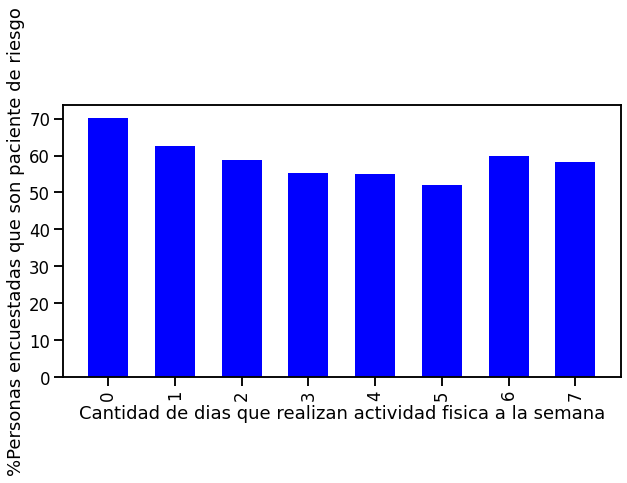

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
  
x_c=Riesgo_actividadfisica.Actividad_Fisica_PorSemana
y_c=Riesgo_actividadfisica.Porcentaje

plt.bar(x_c, y_c, color ='blue',  
        width = 0.6) 
  
plt.xlabel("Cantidad de dias que realizan actividad fisica a la semana") 
plt.ylabel("%Personas encuestadas que son paciente de riesgo") 
plt.xticks(rotation=90)

plt.show() 

In [ ]:
riesgo_b = riesgo_tp.loc[riesgo_tp['Riesgo'] == 'Paciente de riesgo']

In [ ]:
np.shape(riesgo_b)

(10692, 29)

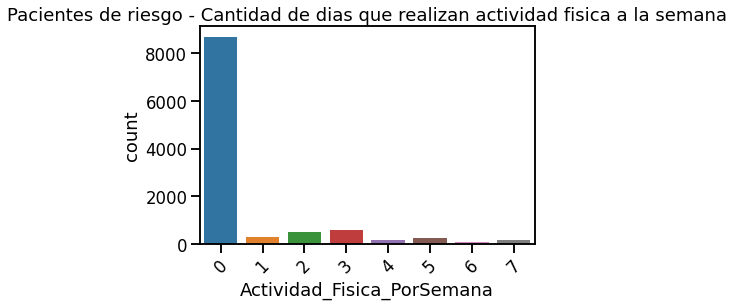

In [ ]:
sns.set_context("talk")
az = sns.countplot(x="Actividad_Fisica_PorSemana", data=riesgo_b)
plt.xticks(rotation=45)
plt.title("Pacientes de riesgo - Cantidad de dias que realizan actividad fisica a la semana")
plt.show()